# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#get current date
date = datetime.date(datetime.now())

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
x=0
temps = []
lat = []
humidity = []
wind = []
clouds = []
bad_cities = []
for city in cities:
    request = base_url + city + "&appid=" + weather_api_key + "&units=imperial"
    print(f'Gathering data for city {x}, {city}.')
    x+= 1
    response = requests.get(request).json()
    try:
        temps.append(response['main']['temp'])
        lat.append(response['coord']['lat'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
    except:
        print(f'{city} has no data.')
        bad_cities.append(city)
    

Gathering data for city 0, barrow.
Gathering data for city 1, hermanus.
Gathering data for city 2, astana.
Gathering data for city 3, port lincoln.
Gathering data for city 4, maldonado.
Gathering data for city 5, punta arenas.
Gathering data for city 6, aripuana.
Gathering data for city 7, ahipara.
Gathering data for city 8, atuona.
Gathering data for city 9, faanui.
Gathering data for city 10, vila franca do campo.
Gathering data for city 11, los llanos de aridane.
Gathering data for city 12, cherskiy.
Gathering data for city 13, torbay.
Gathering data for city 14, avarua.
Gathering data for city 15, albany.
Gathering data for city 16, colares.
Gathering data for city 17, baykit.
Gathering data for city 18, saldanha.
Gathering data for city 19, jamestown.
Gathering data for city 20, hamilton.
Gathering data for city 21, salalah.
Gathering data for city 22, lovozero.
Gathering data for city 23, new norfolk.
Gathering data for city 24, escanaba.
Gathering data for city 25, nottuln.
Gath

Gathering data for city 212, toamasina.
Gathering data for city 213, leningradskiy.
Gathering data for city 214, maryville.
Gathering data for city 215, chapais.
Gathering data for city 216, mozarlandia.
Gathering data for city 217, wajid.
Gathering data for city 218, tsabong.
Gathering data for city 219, eureka.
Gathering data for city 220, luderitz.
Gathering data for city 221, pringsewu.
Gathering data for city 222, mogoytuy.
Gathering data for city 223, sinegorye.
Gathering data for city 224, kuzhenkino.
Gathering data for city 225, darhan.
Gathering data for city 226, sao felix do xingu.
Gathering data for city 227, fruitvale.
Gathering data for city 228, boca do acre.
Gathering data for city 229, sao filipe.
Gathering data for city 230, upernavik.
Gathering data for city 231, dhidhdhoo.
Gathering data for city 232, poyarkovo.
Gathering data for city 233, lazaro cardenas.
Gathering data for city 234, samsun.
Gathering data for city 235, hasaki.
Gathering data for city 236, ulladul

Gathering data for city 419, northam.
Gathering data for city 420, wiarton.
Gathering data for city 421, zeya.
Gathering data for city 422, eyrarbakki.
Gathering data for city 423, tual.
Gathering data for city 424, kalmar.
Gathering data for city 425, purmerend.
Gathering data for city 426, la ronge.
Gathering data for city 427, nanakuli.
Gathering data for city 428, rocha.
Gathering data for city 429, bennington.
Gathering data for city 430, toktogul.
Gathering data for city 431, taybad.
Gathering data for city 432, juegang.
Gathering data for city 433, rawson.
Gathering data for city 434, ocampo.
Gathering data for city 435, awbari.
Gathering data for city 436, seoul.
Gathering data for city 437, inongo.
Gathering data for city 438, constitucion.
Gathering data for city 439, igrim.
Gathering data for city 440, port macquarie.
Gathering data for city 441, the valley.
Gathering data for city 442, tarakan.
Gathering data for city 443, pangody.
Gathering data for city 444, bitung.
Gathe

In [32]:
#print(json.dumps(response, indent=4, sort_keys=True))
print(response['main']['temp'])
print(response['coord']['lat'])
print(response['main']['humidity'])
print(response['wind']['speed'])
print(response['clouds']['all'])

45.59
14.2
55
7.94
5


In [22]:
#remove cities with no data
clean_cities = cities
for bad in bad_cities:
    clean_cities.remove(bad)

ValueError: list.remove(x): x not in list

In [23]:
#verify all arrays are the same length
print(len(cities))
print(len(temps))
print(len(lat))
print(len(humidity))
print(len(wind))
print(len(clouds))
print(len(clean_cities))

575
575
575
575
575
575


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
#Create DataFrame
weather_df = {"City": clean_cities, "Temperatures (F)": temps, "Latitude" : lat, "Humidity %" : humidity, 
              "Wind (mph)" : wind, "Cloudiness": clouds}
weather_df = pd.DataFrame(weather_df)
weather_df

,City,Temperatures (F),Latitude,Humidity %,Wind (mph)
0,barrow,-4.00,71.2906,77,17.27
1,hermanus,66.00,-34.4187,94,7.94
2,astana,19.40,51.1801,79,26.84
3,port lincoln,63.73,-34.7333,64,12.53
4,maldonado,64.47,-34.6667,94,3.44
...,...,...,...,...,...
570,laerdalsoyri,3.83,61.0980,84,3.00
571,longjiang,5.27,47.3303,83,7.85
572,penza,-7.53,53.2007,89,9.15
573,kupang,84.20,-10.1667,89,10.36


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
weather_clean = weather_df.loc[weather_df['Humidity %']<=100]
weather_clean

,City,Temperatures (F),Latitude,Humidity %,Wind (mph)
0,barrow,-4.00,71.2906,77,17.27
1,hermanus,66.00,-34.4187,94,7.94
2,astana,19.40,51.1801,79,26.84
3,port lincoln,63.73,-34.7333,64,12.53
4,maldonado,64.47,-34.6667,94,3.44
...,...,...,...,...,...
570,laerdalsoyri,3.83,61.0980,84,3.00
571,longjiang,5.27,47.3303,83,7.85
572,penza,-7.53,53.2007,89,9.15
573,kupang,84.20,-10.1667,89,10.36


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [26]:
#get current date
from datetime import datetime
date = datetime.date(datetime.now())
print(date)

2021-02-06


## Latitude vs. Temperature Plot

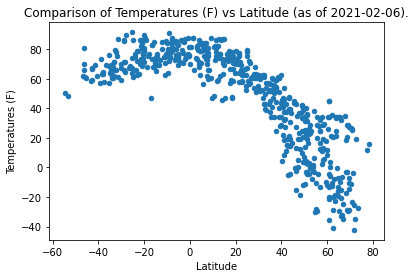

In [30]:
weather_clean.plot('Latitude', "Temperatures (F)", kind = 'scatter')
plt.title(f'Comparison of Temperatures (F) vs Latitude (as of {date}).')
plt.show()

## Latitude vs. Humidity Plot

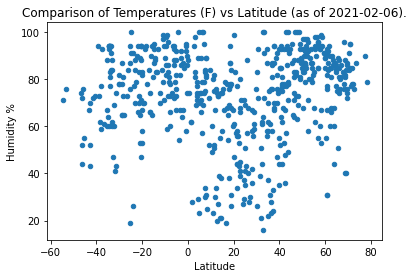

In [33]:
weather_clean.plot('Latitude', "Humidity %", kind = 'scatter')
plt.title(f'Comparison of Temperatures (F) vs Latitude (as of {date}).')
plt.show()

## Latitude vs. Cloudiness Plot

In [ ]:
weather_clean.plot('Latitude', "Cloudiness", kind = 'scatter')
plt.title(f'Comparison of Cloudiness vs Latitude (as of {date}).')
plt.show()

## Latitude vs. Wind Speed Plot

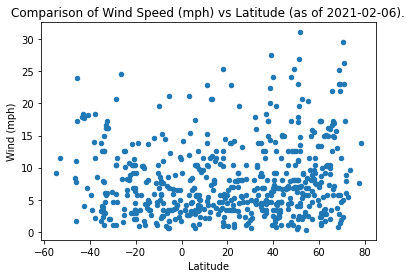

In [34]:
weather_clean.plot('Latitude', "Wind (mph)", kind = 'scatter')
plt.title(f'Comparison of Wind Speed (mph) vs Latitude (as of {date}).')
plt.show()

## Linear Regression

In [36]:
northern_hem_df = weather_clean.loc[weather_clean['Latitude']>= 0]
southern_hem_df = weather_clean.loc[weather_clean['Latitude']<0]

City            Temperatures (F)  Latitude  Humidity %  Wind (mph)
yurimaguas      74.89             -5.9000   93          0.65          1
hithadhoo       81.52             -0.6000   74          11.59         1
isangel         87.80             -19.5500  70          5.75          1
iquique         71.60             -20.2208  53          10.36         1
ipanema         69.98             -30.1391  78          1.14          1
                                                                     ..
nisia floresta  76.10             -6.0911   88          3.44          1
new norfolk     66.99             -42.7826  43          4.00          1
neuquen         73.40             -38.9516  73          3.44          1
nelson bay      79.41             -32.7167  47          17.27         1
ahipara         68.68             -35.1667  67          1.72          1
Length: 172, dtype: int64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

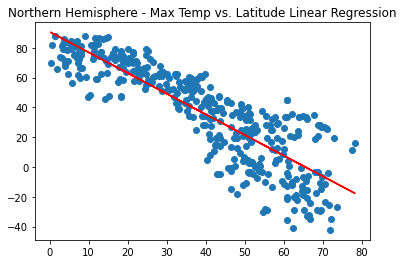

In [38]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem_df['Latitude'], northern_hem_df['Temperatures (F)'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = northern_hem_df['Latitude'] * slope + intercept
plt.plot(northern_hem_df['Latitude'], regress_values, "r-")
plt.scatter(northern_hem_df['Latitude'], northern_hem_df['Temperatures (F)'])
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

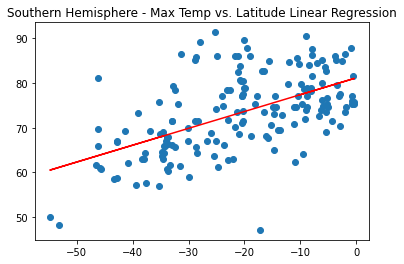

In [39]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem_df['Latitude'], southern_hem_df['Temperatures (F)'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = southern_hem_df['Latitude'] * slope + intercept
plt.plot(southern_hem_df['Latitude'], regress_values, "r-")
plt.scatter(southern_hem_df['Latitude'], southern_hem_df['Temperatures (F)'])
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

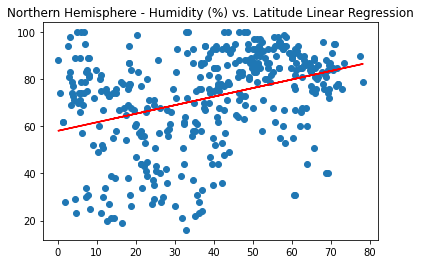

In [40]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem_df['Latitude'], northern_hem_df['Humidity %'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = northern_hem_df['Latitude'] * slope + intercept
plt.plot(northern_hem_df['Latitude'], regress_values, "r-")
plt.scatter(northern_hem_df['Latitude'], northern_hem_df['Humidity %'])
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

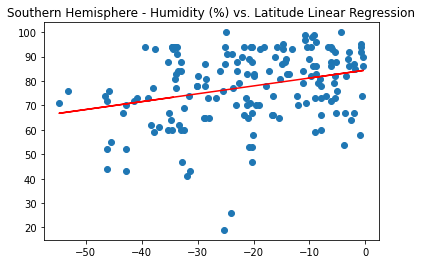

In [41]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem_df['Latitude'],southern_hem_df['Humidity %'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = southern_hem_df['Latitude'] * slope + intercept
plt.plot(southern_hem_df['Latitude'], regress_values, "r-")
plt.scatter(southern_hem_df['Latitude'],southern_hem_df['Humidity %'])
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem_df['Latitude'], northern_hem_df['Cloudiness'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = northern_hem_df['Latitude'] * slope + intercept
plt.plot(northern_hem_df['Latitude'], regress_values, "r-")
plt.scatter(northern_hem_df['Latitude'], northern_hem_df['Cloudiness'])
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem_df['Latitude'], southern_hem_df['Cloudiness'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = southern_hem_df['Latitude'] * slope + intercept
plt.plot(southern_hem_df['Latitude'], regress_values, "r-")
plt.scatter(southern_hem_df['Latitude'], southern_hem_df['Cloudiness'])
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

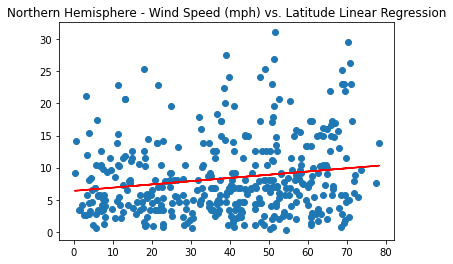

In [42]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem_df['Latitude'], northern_hem_df['Wind (mph)'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = northern_hem_df['Latitude'] * slope + intercept
plt.plot(northern_hem_df['Latitude'], regress_values, "r-")
plt.scatter(northern_hem_df['Latitude'], northern_hem_df['Wind (mph)'])
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

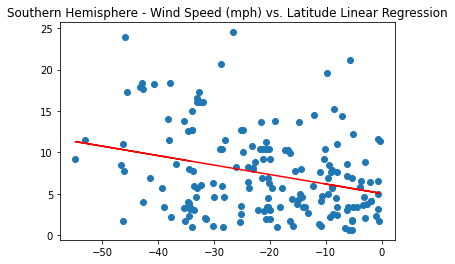

In [43]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem_df['Latitude'], southern_hem_df['Wind (mph)'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = southern_hem_df['Latitude'] * slope + intercept
plt.plot(southern_hem_df['Latitude'], regress_values, "r-")
plt.scatter(southern_hem_df['Latitude'], southern_hem_df['Wind (mph)'])
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.show()